In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [55]:
# Set the style 
sns.set_theme(style="whitegrid", rc={"axes.grid": True})
plt.rcParams.update({'font.size': 12})
font_size = 14
font_size_large = 16

# Get the exact colors from the 'magma' palette to match your other notebook
# FFT (Purple) and LoRA (Coral)
palette = sns.color_palette("magma", 3)
color_fft = palette[0]   # Dark Purple
color_lora = palette[1]  # Coral/Salmon

## LoRA Loss Chart

In [56]:
# Load and combine LoRA data
lora1 = pd.read_csv('../assets/training/loss_lora_merged_1.csv')
lora2 = pd.read_csv('../assets/training/loss_lora_merged_2.csv')
lora2 = lora2[lora2['Step'] >= 30000] # Clean resume point
df_lora = pd.concat([lora1, lora2]).reset_index(drop=True)

# Load and combine FFT data
fft1 = pd.read_csv('../assets/training/loss_fft_merged_1.csv')
fft2 = pd.read_csv('../assets/training/loss_fft_merged_2.csv')
fft2 = fft2[fft2['Step'] >= 30000] # Clean resume point
df_fft = pd.concat([fft1, fft2]).reset_index(drop=True)

In [57]:
# Smoothing (window of 10 = 1000 steps)
lora_col = 'ur-tasks-merged-lora - loss'
fft_col = 'ur-tasks-merged - loss'

df_lora['loss_smoothed'] = df_lora[lora_col].rolling(window=10).mean()
df_fft['loss_smoothed'] = df_fft[fft_col].rolling(window=10).mean()

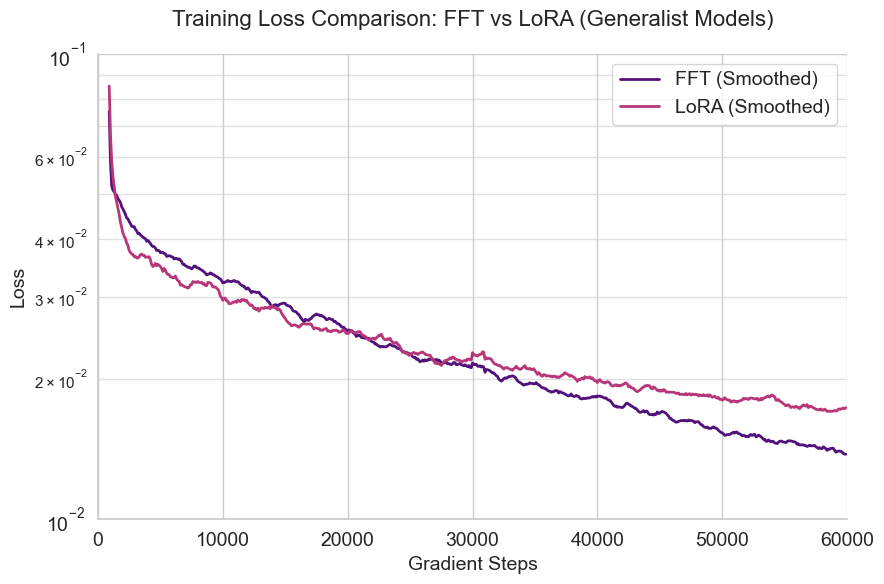

In [58]:
# Plot
plt.figure(figsize=(9, 6))

# Plot FFT (Purple)
# sns.lineplot(data=df_fft, x="Step", y=fft_col, color=color_fft, alpha=0.1, linewidth=0.8)
sns.lineplot(data=df_fft, x="Step", y="loss_smoothed", color=color_fft, linewidth=2, label='FFT (Smoothed)')

# Plot LoRA (Coral)
# sns.lineplot(data=df_lora, x="Step", y=lora_col, color=color_lora, alpha=0.1, linewidth=0.8)
sns.lineplot(data=df_lora, x="Step", y="loss_smoothed", color=color_lora, linewidth=2, label='LoRA (Smoothed)')

plt.title("Training Loss Comparison: FFT vs LoRA (Generalist Models)", pad=20, fontsize=font_size_large)
plt.xlabel("Gradient Steps", fontsize=font_size)
plt.ylabel("Loss", fontsize=font_size)
plt.yscale('log')
plt.xlim(0, 60000)
plt.ylim(1e-2, 1e-1)
ax = plt.gca()
ax.minorticks_on()
ax.grid(True, which='minor', axis='y', linewidth=1, alpha=0.6)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(frameon=True, loc='upper right', fontsize=font_size)
sns.despine()
plt.tight_layout()
plt.show()